# PART 1: Get data from websites

In [1]:
# !pip install requests --upgrade
# !pip install bs4 --upgrade
# !pip install datetime --upgrade
# !pip install pandas --upgrade
# !pip install matplotlib --upgrade
# !pip install nltk
# !pip install wordcloud
# !pip install vaderSentiment
# !pip install gensim
# !pip install pprint
# !pip install google-compute-engine
# !pip install pyLDAvis
# !pip install sklearn

In [2]:
import requests 
from bs4 import BeautifulSoup
import datetime

<h2> 1.1 Get a dictionary of {movie names: movie page urls} of a certain time period </h2>

In [3]:
# Find top 100 movies in a specific year
def movie_from_year(year):
    import datetime
    if year< 1980 or year> int(str(datetime.datetime.now())[:4]):
        raise ValueError('Please input time during 1980 till now.')
    url = 'https://www.boxofficemojo.com/yearly/chart/?yr='+str(year)+'&p=.htm'
    response = requests.get(url)
    results = BeautifulSoup(response.content, 'lxml')
    results = results.find_all('a')        
    
    url_list=[]
    name_list = []
    for result in results:
        if result.get('href') != None:
            if 'id='in result.get('href') and '#' not in result.get_text():
                url_list.append('https://www.boxofficemojo.com'+result.get('href'))
                name_list.append(result.get_text())
    return url_list,name_list

In [4]:
# Find movie urls and names from one year to the other
def find_from_to(yearx,yeary):

    import pandas as pd
    
    list_all_url = []
    list_all_name = []
    
    for year in range(yearx,yeary+1):
        url,name = movie_from_year(year)
        list_all_url.extend(url)
        list_all_name.extend(name)
    
    return {list_all_name[i]:list_all_url[i] for i in range(len(list_all_url))}

In [5]:
# For examople, get the dictionary of {movie name: movie page url} of the yearly TOP 100 movie from 2008 to 2018
movie_url_list = find_from_to(2008,2018)
movie_url_list

{'The Dark Knight': 'https://www.boxofficemojo.com/movies/?id=darkknight.htm',
 'Iron Man': 'https://www.boxofficemojo.com/movies/?id=ironman.htm',
 'Indiana Jones and the Kingdom of the Crystal Skull': 'https://www.boxofficemojo.com/movies/?id=indianajones4.htm',
 'Hancock': 'https://www.boxofficemojo.com/movies/?id=hancock.htm',
 'WALL-E': 'https://www.boxofficemojo.com/movies/?id=wall-e.htm',
 'Kung Fu Panda': 'https://www.boxofficemojo.com/movies/?id=kungfupanda.htm',
 'Twilight': 'https://www.boxofficemojo.com/movies/?id=twilight08.htm',
 'Madagascar: Escape 2 Africa': 'https://www.boxofficemojo.com/movies/?id=madagascar2.htm',
 'Quantum of Solace': 'https://www.boxofficemojo.com/movies/?id=jamesbond22.htm',
 "Dr. Seuss' Horton Hears a Who!": 'https://www.boxofficemojo.com/movies/?id=hortonhearsawho.htm',
 'Sex and the City': 'https://www.boxofficemojo.com/movies/?id=sexandthecity.htm',
 'Gran Torino': 'https://www.boxofficemojo.com/movies/?id=grantorino.htm',
 'Mamma Mia!': 'http

<h2> 1.2 Get the movie's daily gross table given the movie's name </h2>

In [6]:
# Get a specific movie's daily gross
def gross_movie(name,begin_year=1980,end_year=2018):      
    import pandas as pd
    import requests 
    from bs4 import BeautifulSoup
    try:
        movie_url = find_from_to(begin_year,end_year)[name]
        id_position = movie_url.find('id=')
        name_id = movie_url[id_position:]
        url = 'https://www.boxofficemojo.com/movies/?page=daily&view=chart&'+name_id
        response = requests.get(url)
        results = BeautifulSoup(response.content, 'lxml')
        tables = results.select('table')
        df_list = []
        for table in tables:
            df_list.append(pd.concat(pd.read_html(table.prettify())))
        movie_gross = df_list[7]
        movie_gross.columns = ['Day','Date','Rank','Gross','%daily-change','%weekly-change','Theaters','Average','Gross-to-Date','Days']
        movie_gross = movie_gross[(movie_gross['Date'] != 'Date') & (movie_gross['Date'].notnull())]
        movie_gross.set_index('Date',inplace=True)
        movie_gross[['Days']] = movie_gross[['Days']].astype(int)
        return movie_gross        
    except ValueError:
        print(f'{name} is not in the TOP100 of year from to {begin_year} to {end_year}')

In [9]:
# For example, let's get Black Panther's daily gross
gross_Blank_Panther = gross_movie('Black Panther')
gross_Blank_Panther

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Day,Rank,Gross,%daily-change,%weekly-change,Theaters,Average,Gross-to-Date,Days
Date,,,,,,,,,
"Feb. 16, 2018",Fri,1,"$75,941,146",-,-,4020,"$18,891","$75,941,146",1
"Feb. 17, 2018",Sat,1,"$65,995,366",-13.1%,-,4020,"$16,417","$141,936,512",2
"Feb. 18, 2018",Sun,1,"$60,067,439",-9.0%,-,4020,"$14,942","$202,003,951",3
"Feb. 19, 2018",Mon,1,"$40,151,729",-33.2%,-,4020,"$9,988","$242,155,680",4
"Feb. 20, 2018",Tue,1,"$20,857,361",-48.1%,-,4020,"$5,188","$263,013,041",5
"Feb. 21, 2018",Wed,1,"$14,688,057",-29.6%,-,4020,"$3,654","$277,701,098",6
"Feb. 22, 2018",Thu,1,"$14,253,324",-3.0%,-,4020,"$3,546","$291,954,422",7
"Feb. 23, 2018",Fri,1,"$28,789,877",+102.0%,-62.1%,4020,"$7,162","$320,744,299",8
"Feb. 24, 2018",Sat,1,"$47,553,478",+65.2%,-27.9%,4020,"$11,829","$368,297,777",9


 <h2> 1.3 Get a table of a group of  movies' features </h2> 
    <h3>-- Method 1 (Gets more information but operates slower than method 2)</h3>
 <li> First get a single movie's features table by scraping the movie page. Then combine those tables into a big one. </li>

In [18]:
# Get a specific movie's basic information table.
def data_movie(name,begin_year=1980,end_year=2018):      
    import pandas as pd
    import requests 
    from bs4 import BeautifulSoup
    try:
        movie_url = find_from_to(begin_year,end_year)[name]
        response = requests.get(movie_url)
        results = BeautifulSoup(response.content, 'lxml')
        tables = results.select('table')
        df_list = []
        for table in tables:
            df_list.append(pd.concat(pd.read_html(table.prettify())))
        movie_info = {}
        movie_info['Name'] = name
        
        movie_info['Genre'] = df_list[5][0].iloc[2][8:]
        movie_info['Runtime'] = df_list[5][1].iloc[2][10:]
        movie_info['Production Budget'] = df_list[5][1].iloc[3][20:]
        
        movie_info['Domestic Gross'] = df_list[9][1].iloc[0]
        try:
            movie_info['Foreign Gross'] = df_list[9][1].iloc[1]
        except:
            movie_info['Foreign Gross'] = None
        try:
            movie_info['Worldwide Gross'] = df_list[9][1].iloc[3]
        except:
            movie_info['Worldwide Gross'] = None
        
        movie_info['Release Date'] = df_list[5][1].iloc[1][15:]
    
        for n in [12,13,14,15,16]:
            if df_list[n][0].iloc[0] == 'In Release:':      
                movie_info['Inrelease Time'] = df_list[n][1].iloc[0]
                df_list[n+1].set_index(0,inplace=True)
                
                try:
                    movie_info['Actors'] = df_list[n+1][1].loc['Actors:']
                except:
                    movie_info['Actors'] = None
                
                try:
                    movie_info['Director'] = df_list[n+1][1].loc['Director:']
                except:
                    movie_info['Director'] = None   
                
                try:
                    movie_info['Producer'] = df_list[n+1][1].loc['Producer:']
                except:
                    movie_info['Producer'] = None   
                
                break
            else:
                n = n + 1
   
        movie_info['Distributor'] = df_list[5][0].iloc[1][14:]
        
        mv = pd.DataFrame(list(movie_info.items()))
        mv.columns = ['Items',name]
        mv.set_index('Items',inplace=True)
#         mv.to_csv(path_or_buf=f'./{name}Basic_info.csv')
        mv
        return mv
    except:
        None

In [11]:
# For example, let's get Black Panther's features table.
Black_Panther = data_movie('Black Panther',2018,2018)
Black_Panther

,Black Panther
Items,
Name,Black Panther
Genre,Action / Adventure
Runtime,2 hrs. 20 min.
Production Budget,N/A
Domestic Gross,"$700,059,566"
Foreign Gross,"$646,853,595"
Worldwide Gross,"$1,346,913,161"
Release Date,"February 16, 2018"
Inrelease Time,175 days / 25 weeks


In [8]:
# Combine all the movies' information table into a big one by iteration.
def data_movies_table(begin_year=1980,end_year=2018,input_name=None):  
    if not input_name == None:
        name_list = input_name
    else:
        name_list = list(find_from_to(begin_year,end_year).keys())
    movie_table = data_movie(name_list[0],begin_year,end_year)
    for name in name_list[1:]:
        try:
            movie_info = data_movie(name,begin_year,end_year)
            movie_table[name]=movie_info[name]
        except:
            continue

#     mv.to_csv(path_or_buf=f'./{begin_year}-{end_year}some movies basic info.csv')
    return movie_table.T 

In [9]:
# For example, let's get a data table for movies in TOP100 of year 2018.
data_2018 = data_movies_table(2018,2018)
data_2018

Items,Name,Genre,Runtime,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,Release Date,Inrelease Time,Actors,Director,Producer,Distributor
Black Panther,Black Panther,Action / Adventure,2 hrs. 20 min.,N/A,"$700,059,566","$646,853,595","$1,346,913,161","February 16, 2018",175 days / 25 weeks,Chadwick Boseman Lupita Nyong'o Michael B. J...,Ryan Coogler,Kevin Feige,Buena Vista
Avengers: Infinity War,Avengers: Infinity War,Action / Adventure,2 hrs. 36 min.,N/A,"$678,815,482","$1,368,094,154","$2,046,909,636","April 27, 2018",140 days / 20 weeks,"Robert Downey, Jr. Chris Hemsworth Mark Ruff...",None,Kevin Feige,Buena Vista
Incredibles 2,Incredibles 2,Animation,1 hrs. 58 min.,N/A,"$608,546,638","$632,328,436","$1,240,875,074","June 15, 2018",171 days / 24.4 weeks,Craig T. Nelson (Voice) Holly Hunter (Voice...,Brad Bird,None,Buena Vista
Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,Action / Adventure,2 hrs. 8 min.,$170 million,"$416,769,345","$888,174,715","$1,304,944,060","June 22, 2018",105 days / 15 weeks,Chris Pratt Bryce Dallas Howard Jeff Goldblu...,J.A. Bayona,None,Universal
Deadpool 2,Deadpool 2,Action,1 hrs. 59 min.,$110 million,"$318,491,426","$415,754,495","$734,245,921","May 18, 2018",154 days / 22 weeks,Ryan Reynolds Josh Brolin Morena Baccarin T...,David Leitch,None,Fox
Mission: Impossible - Fallout,Mission: Impossible - Fallout,Action,2 hrs. 27 min.,$178 million,"$220,159,104","$570,858,348","$791,017,452","July 27, 2018",84 days / 12 weeks,Tom Cruise Henry Cavill Simon Pegg Rebecca ...,Christopher McQuarrie,David Ellison (executive),Paramount
Ant-Man and the Wasp,Ant-Man and the Wasp,Action,1 hrs. 58 min.,N/A,"$216,648,740","$405,957,488","$622,606,228","July 6, 2018",119 days / 17 weeks,Paul Rudd Evangeline Lilly Michael Pena Wal...,Peyton Reed,Kevin Feige,Buena Vista
Solo: A Star Wars Story,Solo: A Star Wars Story,Action / Adventure,2 hrs. 15 min.,N/A,"$213,767,512","$179,157,295","$392,924,807","May 25, 2018",119 days / 17 weeks,Alden Ehrenreich Donald Glover Emilia Clarke...,Ron Howard,Kathleen Kennedy,Buena Vista
Venom (2018),Venom (2018),Action,1 hrs. 52 min.,$100 million,"$212,270,652","$631,700,000","$843,970,652","October 5, 2018",59 days / 8.4 weeks,Tom Hardy Michelle Williams Woody Harrelson ...,Ruben Fleischer,None,Sony / Columbia
Dr. Seuss' The Grinch (2018),Dr. Seuss' The Grinch (2018),Animation,1 hrs. 30 min.,$75 million,"$203,507,195","$64,800,000","$268,307,195","November 9, 2018",24 days / 3.4 weeks,Benedict Cumberbatch (Voice) Rashida Jones ...,None,None,Universal


In [20]:
data_2014 = data_movies_table(2014,2018)
data_2014

Items,Name,Genre,Runtime,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,Release Date,Inrelease Time,Actors,Director,Producer,Distributor
American Sniper,American Sniper,Drama,2 hrs. 12 min.,$58.8 million,"$350,126,372","$197,300,000","$547,426,372","December 25, 2014",183 days / 26.1 weeks,Bradley Cooper Kyle Gallner Sienna Miller,Clint Eastwood,None,Warner Bros.
The Hunger Games: Mockingjay - Part 1,The Hunger Games: Mockingjay - Part 1,Action / Adventure,2 hrs. 3 min.,$125 million,"$337,135,885","$418,220,826","$755,356,711","November 21, 2014",119 days / 17 weeks,Jennifer Lawrence Josh Hutcherson Liam Hemsw...,Francis Lawrence,None,Lionsgate
Guardians of the Galaxy,Guardians of the Galaxy,Action / Adventure,2 hrs. 1 min.,$170 million,"$333,176,600","$440,152,029","$773,328,629","August 1, 2014",175 days / 25 weeks,Michael Rooker Chris Pratt Zoe Saldana Dave...,James Gunn,None,Buena Vista
Captain America: The Winter Soldier,Captain America: The Winter Soldier,Action / Adventure,2 hrs. 16 min.,$170 million,"$259,766,572","$454,497,695","$714,264,267","April 4, 2014",140 days / 20 weeks,Chris Evans Scarlett Johansson Samuel L. Jac...,None,None,Buena Vista
The LEGO Movie,The LEGO Movie,Animation,1 hrs. 40 min.,$60 million,"$257,760,692","$211,400,000","$469,160,692","February 7, 2014",210 days / 30 weeks,Will Arnett (Voice) Elizabeth Banks (Voice)...,None,None,Warner Bros.
The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,Fantasy,2 hrs. 24 min.,N/A,"$255,119,788","$700,900,000","$956,019,788","December 17, 2014",107 days / 15.3 weeks,Ian McKellen Martin Freeman Richard Armitage...,Peter Jackson,None,Warner Bros. (New Line)
Transformers: Age of Extinction,Transformers: Age of Extinction,Sci-Fi Action,2 hrs. 45 min.,$210 million,"$245,439,076","$858,614,996","$1,104,054,072","June 27, 2014",105 days / 15 weeks,Mark Wahlberg Nicola Peltz Jack Reynor TJ M...,Michael Bay,None,Paramount
Maleficent,Maleficent,Fantasy,1 hrs. 37 min.,$180 million,"$241,410,378","$517,129,407","$758,539,785","May 30, 2014",189 days / 27 weeks,Angelina Jolie Sharlto Copley Elle Fanning ...,Robert Stromberg,None,Buena Vista
X-Men: Days of Future Past,X-Men: Days of Future Past,Action / Adventure,2 hrs. 11 min.,$200 million,"$233,921,534","$513,941,241","$747,862,775","May 23, 2014",140 days / 20 weeks,Fan Bingbing Omar Sy Hugh Jackman James McA...,Bryan Singer,None,Fox
Big Hero 6,Big Hero 6,Animation,1 hrs. 48 min.,$165 million,"$222,527,828","$435,290,784","$657,818,612","November 7, 2014",203 days / 29 weeks,TJ Miller (Voice) Alan Tudyk (Voice) Genes...,None,None,Buena Vista


<h3>-- Method 2 (Faster but gets less information than method 1)</h3>
    <li>We want to do some analysis about moives' features distribution and trends over time. Since a trend often requires a long time, which takes a long timeto see the result with the above function, we turn to another function to download the movie data, which is faster but includes fewer features.</li>

In [10]:
# Find a movie's data with a provided url
def movie_data(url):
    from bs4 import BeautifulSoup
    import pandas as pd
    import numpy as np
    import requests
    response=requests.get(url)
    result = BeautifulSoup(response.content,'lxml')
    name = ['Name','Domestic Total Gross','Distributor','Release Time','Genre','Runtime','MPAA Rating','Production Budget','Worldwide Gross']
    data_list = [item.get_text() for item in result.find_all('b')[1:9]]
    data_list.append(result.find_all('b')[13].get_text())
    if 'Domestic Lifetime Gross:' in data_list[2]:
        data_list = [item.get_text() for item in result.find_all('b')[1:3]]
        new_list = [item.get_text() for item in result.find_all('b')[4:10]]
        data_list.extend(new_list)
        data_list.append(result.find_all('b')[14].get_text())
    if '$' not in data_list[-1]:
        data_list[-1] = 'N/A'
    a = pd.DataFrame(data_list,name)
    b = np.transpose(a)
    b.set_index('Name', inplace = True)
    return b

#Find top 100 movies' data
def movie_data_group(year):   
    import pandas as pd
    url_list,name_list = movie_from_year(year)
    list_ = []
    for url in url_list:
        try:
            a = movie_data(url)
        except:
            continue
        list_.append(a)
    try:
        return pd.concat(list_)
    except:
        return 'No data'

In [11]:
# A example for method 2.
movie_2016 = movie_data_group(2016)
movie_2016

,Domestic Total Gross,Distributor,Release Time,Genre,Runtime,MPAA Rating,Production Budget,Worldwide Gross
Name,,,,,,,,
Finding Dory,"$486,295,561",Buena Vista,"June 17, 2016",Animation,1 hrs. 43 min.,PG,N/A,"$1,028,570,889"
Captain America:Civil War,"$408,084,349",Buena Vista,"May 6, 2016",Action / Adventure,2 hrs. 27 min.,PG-13,$250 million,"$1,153,304,495"
The Secret Life of Pets,"$368,384,330",Universal,"July 8, 2016",Animation,1 hrs. 30 min.,PG,$75 million,"$875,457,937"
The Jungle Book (2016),"$364,001,123",Buena Vista,"April 15, 2016",Adventure,1 hrs. 45 min.,PG,$175 million,"$966,550,600"
Deadpool,"$363,070,709",Fox,"February 12, 2016",Action,1 hrs. 46 min.,R,$58 million,"$783,112,979"
Zootopia,"$341,268,248",Buena Vista,"March 4, 2016",Animation,1 hrs. 48 min.,PG,N/A,"$1,023,784,195"
Batman v Superman:Dawn of Justice,"$330,360,194",Warner Bros.,"March 25, 2016",Action / Adventure,2 hrs. 31 min.,PG-13,$250 million,"$873,634,919"
Sing,"$270,395,425",Universal,"December 21, 2016",Animation,1 hrs. 50 min.,PG,$75 million,"$634,151,679"
Moana,"$248,757,044",Buena Vista,"November 23, 2016",Animation,1 hrs. 43 min.,PG,N/A,"$643,331,111"


 <h2> 1.4 Reform the data table. </h2> 
 <li> Since the type of gross data from websites is string,we change it into int and add two columns to the table. </li>

In [12]:
# Change "Domestic Gross" and "Foreign Gross" into int and add two columns to the table.
def data_movies_format_01(begin_year=1980,end_year=2018,input_name=None):  
    import re
    
    # get the table from website
    if input_name is None:
        df = data_movies_table(begin_year,end_year)
    else:
        df = data_movies_table(begin_year,end_year,input_name)
    
    #set the correct pattern of gross data
    pattern = re.compile(r'\d+')
    
    # attach a new column of 'domes_gross' to the data table 
    domes_gross = []
    for item in df['Domestic Gross']:        
        num = ''
        match = re.findall(pattern,item) 
        if match:
            for n in range(len(match)):
                num += match[n]
            domes_gross.append(int(num))
        else:
            domes_gross.append(0)
    df['domes_gross'] = domes_gross

    # attach a new column of 'forei_gross' to the data table 
    foreign_gross = []
    for item in df['Foreign Gross']:
        try:
            num = ''
            match = re.findall(pattern,item) 
            if match:
                for n in range(len(match)):
                    num += match[n]
                foreign_gross.append(int(num))
            else:
                foreign_gross.append(0)
        except:
            foreign_gross.append(0)
    df['forei_gross'] = foreign_gross    
    
    df = df[(df['domes_gross'] > 0) & (df['forei_gross'] > 0)]
    
    return df    

In [17]:
data_2018_format01 = data_movies_format_01(2018,2018)
data_2018_format01

Items,Name,Genre,Runtime,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,Release Date,Inrelease Time,Actors,Director,Producer,Distributor,domes_gross,forei_gross
Black Panther,Black Panther,Action / Adventure,2 hrs. 20 min.,N/A,"$700,059,566","$646,853,595","$1,346,913,161","February 16, 2018",175 days / 25 weeks,Chadwick Boseman Lupita Nyong'o Michael B. J...,Ryan Coogler,Kevin Feige,Buena Vista,700059566,646853595
Avengers: Infinity War,Avengers: Infinity War,Action / Adventure,2 hrs. 36 min.,N/A,"$678,815,482","$1,368,094,154","$2,046,909,636","April 27, 2018",140 days / 20 weeks,"Robert Downey, Jr. Chris Hemsworth Mark Ruff...",None,Kevin Feige,Buena Vista,678815482,1368094154
Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,Action / Adventure,2 hrs. 8 min.,$170 million,"$416,769,345","$888,174,715","$1,304,944,060","June 22, 2018",105 days / 15 weeks,Chris Pratt Bryce Dallas Howard Jeff Goldblu...,J.A. Bayona,None,Universal,416769345,888174715
Deadpool 2,Deadpool 2,Action,1 hrs. 59 min.,$110 million,"$318,491,426","$415,754,495","$734,245,921","May 18, 2018",154 days / 22 weeks,Ryan Reynolds Josh Brolin Morena Baccarin T...,David Leitch,None,Fox,318491426,415754495
Mission: Impossible - Fallout,Mission: Impossible - Fallout,Action,2 hrs. 27 min.,$178 million,"$220,159,104","$570,858,348","$791,017,452","July 27, 2018",84 days / 12 weeks,Tom Cruise Henry Cavill Simon Pegg Rebecca ...,Christopher McQuarrie,David Ellison (executive),Paramount,220159104,570858348
Ant-Man and the Wasp,Ant-Man and the Wasp,Action,1 hrs. 58 min.,N/A,"$216,648,740","$405,957,488","$622,606,228","July 6, 2018",119 days / 17 weeks,Paul Rudd Evangeline Lilly Michael Pena Wal...,Peyton Reed,Kevin Feige,Buena Vista,216648740,405957488
Venom (2018),Venom (2018),Action,1 hrs. 52 min.,$100 million,"$212,270,652","$631,700,000","$843,970,652","October 5, 2018",59 days / 8.4 weeks,Tom Hardy Michelle Williams Woody Harrelson ...,Ruben Fleischer,None,Sony / Columbia,212270652,631700000
A Star is Born (2018),A Star is Born (2018),Music Drama,2 hrs. 16 min.,$36 million,"$193,822,436","$168,600,000","$362,422,436","October 5, 2018",59 days / 8.4 weeks,Lady Gaga Bradley Cooper Sam Elliott Dave C...,Bradley Cooper,None,Warner Bros.,193822436,168600000
A Quiet Place,A Quiet Place,Horror Thriller,1 hrs. 35 min.,$17 million,"$188,024,361","$152,652,838","$340,677,199","April 6, 2018",119 days / 17 weeks,Emily Blunt John Krasinski,John Krasinski,None,Paramount,188024361,152652838
Crazy Rich Asians,Crazy Rich Asians,Romantic Comedy,2 hrs. 0 min.,$30 million,"$173,907,689","$64,000,000","$237,907,689","August 15, 2018",107 days / 15.3 weeks,Constance Wu Henry Golding Michelle Yeoh Aw...,Jon Chu,Nina Jacobson,Warner Bros.,173907689,64000000


 <h2> 1.5 Find some news titles of one of the top 100 movie given a year </h2>

In [ ]:
#This function helps users to find some news titles of one of the top 100 movie with a known year.
def news_of_movie(name, year):
    import requests
    from bs4 import BeautifulSoup
    data = find_from_to(year,year)
    url = data[name]
    response = requests.get(url)
    results = BeautifulSoup(response.content, 'lxml')
    news_list = []
    for item in results.find_all('a'):
        if 'news/?' in item.get('href'):
            news_list.append(item.get_text())
    return news_list

In [ ]:
# For example, if you want to know some news about Incredibles 2.
news_of_movie('Incredibles 2', 2018)

 <h2> 1.6 Find the specified distributor's released movie given a year </h2>

In [ ]:
# With this function, users can find the specified distributor's released movie in a year.
def distributor_movie(name,year):
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    import matplotlib.pyplot as plt 
    if year<2000 or year> int(str(datetime.datetime.now())[:4]):
        raise ValueError('Please input year no earlier than 2000 and later than this year.')

    url = 'https://www.boxofficemojo.com/studio/?view=company&view2=yearly&yr='+str(year)+'&p=.htm'
    response = requests.get(url)
    results = BeautifulSoup(response.content, 'lxml')
    list_= results.find_all('b')[7:]
    list_new = list_[:-4]
    list_distributor = []
    for i in range(len(list_new)): 
        if i % 2 ==0:
            list_distributor.append(list_new[i])
    list_2 = results.find_all('a')
    list_3 = []
    for item in list_2:
        if '/studio/chart/?yr' in item.get('href'):
            list_3.append('https://www.boxofficemojo.com'+item.get('href'))
    dict_new = {}
    for i in range(len(list_distributor)):
        dict_new[list_distributor[i].get_text()] = list_3[i]

    try:
        url =dict_new[name]
    except:
        raise ValueError('Sorry, cannot find the distributor in the list of the specified year.')
    response = requests.get(url)
    results = BeautifulSoup(response.content,'lxml')
    movie_list = []
    list_open = []
    for item in results.find_all('a'):
        if 'movies/?id' in item.get('href') and '#1' not in item.get_text():
            movie_list.append(item.get_text())
        if 'schedule/?' in item.get('href'):
            list_open.append(item.get_text())

    box_list = []
    for item in results.find_all('b'):
        if '$' in item.get_text():
            box_list.append(item.get_text())

    dict_box ={}
    for i in range(len(box_list)):
        dict_box[movie_list[i]] = box_list[i]
    df = pd.DataFrame(pd.Series(dict_box),columns = ['Gross'])
    df['Open Date'] = list_open
    return df

In [ ]:
#For example, if you want to see the movies released by Warner Bros. in 2018.
distributor_movie('Warner Bros.',2018)

<h1>PART 2: Analysis on movies data</h1>

<h2> 2.1 Plot the trend of a single movie's daily gross </h2>

In [10]:
# Plot a line chart to present the movie's gross-to-date trend.
def single_movie_gross_plot(name):
    import re
    df = gross_movie(name)
    
    # attach a new column of 'domes_gross' to the data table 
    gross = []
    pattern_1 = re.compile(r'\d+')
    for data in df['Gross-to-Date']:
        num = ''
        match = re.findall(pattern_1,data) 
        if match:
            for n in range(len(match)):
                num += match[n]
            gross.append(int(num))
        else:
            gross.append(0)
    df['GrosstoDate'] = gross  
    
    return df['GrosstoDate'].plot()

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


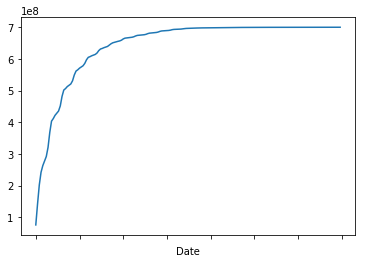

In [12]:
# For examle, this line chart shows the gross-to-date trend of 'Blanc Panther'
single_movie_gross_plot('Black Panther')

In [14]:
# Plot a line chart to present the movie's daily-gross-percent-change.
def single_movie_dailychange_plot(name):
    import re
    df = gross_movie(name)
    
    # attach a new column of 'daily_perchange' to the data table 
    change = []
    pattern_2 = re.compile(r'%$')
    for data in df['%daily-change']:
        match = re.findall(pattern_2,data) 
        if match:
            data = data.strip('+%').replace(',','')
            change.append(float(data)/100)
        else:
            change.append(0)
    df['daily_perchange'] = change   
    
    return df['daily_perchange'].plot()

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


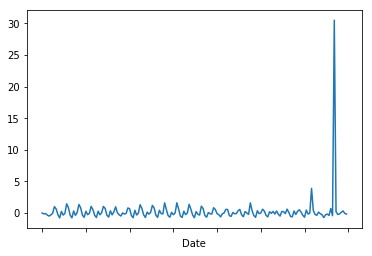

In [15]:
# For examle, this line chart shows the daily-gross-percent-change trend of 'Blanc Panther'
single_movie_dailychange_plot('Black Panther')

<h2> 2.2 Distribution of domestic gross and foreign gross  </h2>

In [19]:
# Calculate the ratio of domestic and foreign gross box office.
# Point out movies with the top 10 and top 100 highest raios and draw a pie chart.
def domestic_foreign_dis(year):
    import datetime
    import numpy as np
    import matplotlib.pyplot as plt
    
    if year< 1980 or year> int(str(datetime.datetime.now())[:4]):
        raise ValueError('Please input time during 1980 till now.')
    df = data_movies_format_01(year,year)   
    
    top10_domes = sum(df[df['domes_gross'] > df['domes_gross'].iloc[10]]['domes_gross'])
    top10_foreign = sum(df[df['domes_gross'] > df['domes_gross'].iloc[10]]['forei_gross'])
    top100_domes = sum(df['domes_gross'])
    top100_foreign = sum(df['forei_gross'])  
    
    # plot pie chart of TOP10 movies' gross distribution
    labels_10 = 'TOP 10 Domestic', 'TOP 10 Foreign'
    fracs_10 = [top10_domes, top10_foreign]
    explode = [0, 0.1]
    plt.axes(aspect=1)
    plt.pie(x=fracs_10, labels=labels_10, explode=explode,autopct='%3.1f %%',shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
    plt.title(" TOP10 Movies' Gross Distribution of "+ str(year))
    a = plt.show()
    # plot pie chart of TOP100 movies' gross distribution
    labels_100 = 'TOP 100 Domestic', 'TOP 100 Foreign'
    fracs_100 = [top100_domes, top100_foreign] 
    plt.pie(x=fracs_100, labels=labels_100, explode=explode,autopct='%3.1f %%',shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
    plt.title(" TOP100 Movies' Gross Distribution of "+ str(year))
    b = plt.show()
    return a,b    

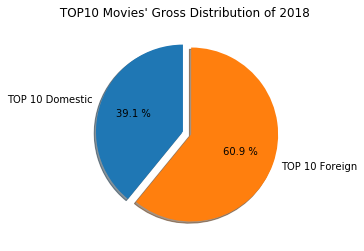

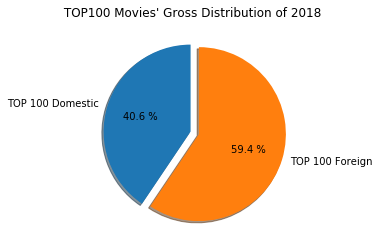

In [20]:
domestic_foreign_2018 = domestic_foreign_dis(2018)

<h2> 2.3 Show the top 5 distributors' market shares of the whole movie market in a specific year.</h2>

In [113]:
# With this function, users can see a specific year's top 5 movie market shares 
# through a pie graph.
def market_data(year):
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    import matplotlib.pyplot as plt 
    if year<2000 or year> int(str(datetime.datetime.now())[:4]):
        raise ValueError('Please input year no earlier than 2000 and later than this year.')

    url = 'https://www.boxofficemojo.com/studio/?view=company&view2=yearly&yr='+str(year)+'&p=.htm'
    response = requests.get(url)
    results = BeautifulSoup(response.content, 'lxml')
    list_= results.find_all('b')[7:]
    list_new = list_[:-4]
    dict_new = {}
    for i in range(len(list_new)):
        if i%2 == 0:
            dict_new[list_new[i].get_text()]=list_new[i+1].get_text()
    df = pd.Series(dict_new)
    label = list(df.index)
    x = list(df)
    x = [float(item[:-1]) for item in x]
    abc = [(label[i],x[i]) for i in range(len(label))]
    ab = abc[:5]
    new_label = [item[0] for item in ab]
    new_x = [item[1] for item in ab]
    new_label.append('Others')
    total = [item[1] for item in abc]
    new_x.append(sum(total)-sum(new_x))
    fig = plt.figure()
    plt.axes(aspect=1)
    plt.pie(new_x,labels=new_label,autopct='%1.2f%%',shadow= True) 
    plt.title(f'{year} Year Movie Market Distribution')
    plt.show()

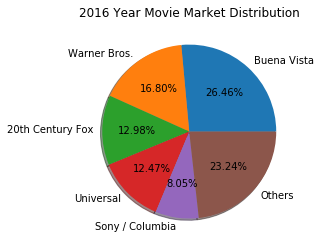

In [114]:
# For example, if you want to see the share distribution of 2016.
market_data(2016)

<h2> 2.4 Draw pie graphs for the feature distributions in top 100 movies of a given year.</h2>
<li> Features can be 'genre', 'distributor' and 'Rating'

In [57]:
#This function is used to draw a pie graph for the feature distributions in top 100 movies.
def pie_graph(data,feature):
    
    import pandas as pd
    import numpy as np  
    import matplotlib.pyplot as plt 
    new_data = data.groupby(feature).size().sort_values(ascending = False)
    label = list(new_data.index)
    x = list(new_data)
    abc = [(label[i],x[i]) for i in range(len(label))]
    ab = abc[:5]
    new_label = [item[0] for item in ab]
    new_x = [item[1] for item in ab]
    new_label.append('Others')
    total = [item[1] for item in abc]
    new_x.append(sum(total)-sum(new_x))
    fig = plt.figure()
    plt.axes(aspect=1)
    plt.pie(new_x,labels=new_label,autopct='%1.2f%%',shadow= True) 
    plt.title(feature.capitalize()+" Distribution")
    plt.show()

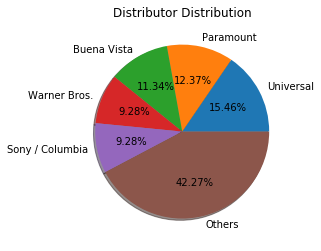

In [60]:
pie_graph(movie_2016,'Distributor')

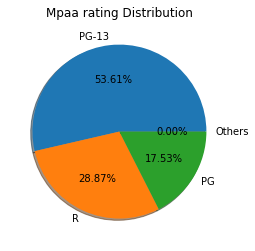

In [63]:
pie_graph(movie_2016,'MPAA Rating')

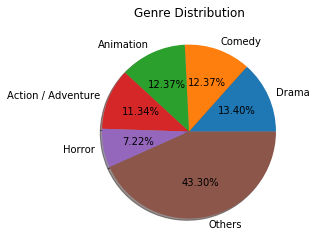

In [58]:
pie_graph(movie_2016,'Genre')

<h2> 2.5 Group movies by box office and see the distribution of showtime and genres of groups.</h2>
<h3> 2.5.1 Group movies by box office.</h3>

In [13]:
# Start to group movies by box office. 
# We devide the box office into three types, which are high, moderate and low, and look into genres and showtimes.
# Assign movies into different groups by gross(int)
def groupbybox(begin_year,end_year):
    df = data_movies_format_01(begin_year,end_year)
    box = []
    for item in df['domes_gross']:
        if item >= df.domes_gross.quantile(0.9):
            box.append('High')
        elif item >= df.domes_gross.quantile(0.5):
            box.append('NotBad')
        else:
            box.append('Low')
    df['Box'] = box
    return df

In [14]:
data_groupbybox = groupbybox(2018,2018)
data_groupbybox

Items,Name,Genre,Runtime,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,Release Date,Inrelease Time,Actors,Director,Producer,Distributor,domes_gross,forei_gross,Box
Black Panther,Black Panther,Action / Adventure,2 hrs. 20 min.,N/A,"$700,059,566","$646,853,595","$1,346,913,161","February 16, 2018",175 days / 25 weeks,Chadwick Boseman Lupita Nyong'o Michael B. J...,Ryan Coogler,Kevin Feige,Buena Vista,700059566,646853595,High
Avengers: Infinity War,Avengers: Infinity War,Action / Adventure,2 hrs. 36 min.,N/A,"$678,815,482","$1,368,094,154","$2,046,909,636","April 27, 2018",140 days / 20 weeks,"Robert Downey, Jr. Chris Hemsworth Mark Ruff...",None,Kevin Feige,Buena Vista,678815482,1368094154,High
Incredibles 2,Incredibles 2,Animation,1 hrs. 58 min.,N/A,"$608,546,638","$632,328,436","$1,240,875,074","June 15, 2018",171 days / 24.4 weeks,Craig T. Nelson (Voice) Holly Hunter (Voice...,Brad Bird,None,Buena Vista,608546638,632328436,High
Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,Action / Adventure,2 hrs. 8 min.,$170 million,"$416,769,345","$888,174,715","$1,304,944,060","June 22, 2018",105 days / 15 weeks,Chris Pratt Bryce Dallas Howard Jeff Goldblu...,J.A. Bayona,None,Universal,416769345,888174715,High
Deadpool 2,Deadpool 2,Action,1 hrs. 59 min.,$110 million,"$318,491,426","$415,754,495","$734,245,921","May 18, 2018",154 days / 22 weeks,Ryan Reynolds Josh Brolin Morena Baccarin T...,David Leitch,None,Fox,318491426,415754495,High
Mission: Impossible - Fallout,Mission: Impossible - Fallout,Action,2 hrs. 27 min.,$178 million,"$220,159,104","$570,858,348","$791,017,452","July 27, 2018",84 days / 12 weeks,Tom Cruise Henry Cavill Simon Pegg Rebecca ...,Christopher McQuarrie,David Ellison (executive),Paramount,220159104,570858348,High
Ant-Man and the Wasp,Ant-Man and the Wasp,Action,1 hrs. 58 min.,N/A,"$216,648,740","$405,957,488","$622,606,228","July 6, 2018",119 days / 17 weeks,Paul Rudd Evangeline Lilly Michael Pena Wal...,Peyton Reed,Kevin Feige,Buena Vista,216648740,405957488,High
Solo: A Star Wars Story,Solo: A Star Wars Story,Action / Adventure,2 hrs. 15 min.,N/A,"$213,767,512","$179,157,295","$392,924,807","May 25, 2018",119 days / 17 weeks,Alden Ehrenreich Donald Glover Emilia Clarke...,Ron Howard,Kathleen Kennedy,Buena Vista,213767512,179157295,High
Venom (2018),Venom (2018),Action,1 hrs. 52 min.,$100 million,"$212,270,652","$631,700,000","$843,970,652","October 5, 2018",59 days / 8.4 weeks,Tom Hardy Michelle Williams Woody Harrelson ...,Ruben Fleischer,None,Sony / Columbia,212270652,631700000,NotBad
A Star is Born (2018),A Star is Born (2018),Music Drama,2 hrs. 16 min.,$36 million,"$193,822,436","$168,600,000","$362,422,436","October 5, 2018",59 days / 8.4 weeks,Lady Gaga Bradley Cooper Sam Elliott Dave C...,Bradley Cooper,None,Warner Bros.,193822436,168600000,NotBad


<h3> 2.5.2 Groupby showtime and display the distribution</h3>
<li> Firstly, define three new columns for movie showtimes, specifying date, month and the year, so as to prepare us for further analysis about showtimes.</li>
<li> Secondly, groupby showtime</li>
<li> Then, display the distribution. </li>

In [15]:
# define three new columns for movie showtimes, specifying date, month and the year, so as to prepare us for further analysis about showtimes.
def showtimes(begin_year,end_year):
    df = groupbybox(begin_year,end_year)
    import re
    pattern = r''' 
    ^                        # match beginning of string
    (?P<month>[A-Za-z]+)     # match month
    \s+                      # match space between names
    (?P<date>\d+)            # match date
    \W+
    (?P<year>\d{4})          # match year
    $                        # match end of string
'''
    flags = (re.IGNORECASE |  # Match against upper and lower case with one case
    re.VERBOSE  # Match with comments
)
    month_l = []
    date_l = []
    year_l = []
    
    for item in df['Release Date']:
        match = re.match(pattern, item, flags=flags)
        if match:
            month_l.append(match.group('month'))
            date_l.append(match.group('date'))
            year_l.append(match.group('year'))
        else:
            month_l.append(None)
            date_l.append(None)
            year_l.append(None)     
    df['month'] = month_l
    df['date'] = date_l
    df['year'] = year_l
# change date into int type  
    import re
    Date = []
    for item in df['date']:
        pattern_1 = re.compile(r'\d+')
        match_1 = re.findall(pattern_1,item) 
        num = ''
        for n in range(len(match_1)):
            num += match_1[n]
        Date.append(int(num))
    df['dateint'] = Date

# We add a new column specifying five different showtimes of movies. Traditionally, movie showtimes are divided into five parts, which are
# spring, summer, fall, winter and holiday season.  
    showtime = []
    index = -1
    for item in df['month']:
        index += 1
        if item == 'February':
            showtime.append('winter')
        elif item == 'January':
            if df['dateint'].iloc[index] >= 3:
                showtime.append('winter')
            else:
                showtime.append('holiday')
        elif item == 'March':
            if df['dateint'].iloc[index] <= 10:
                showtime.append('winter')
            else:
                showtime.append('spring')
        elif item == 'April':
            showtime.append('spring')
        elif item == 'May':
            if df['dateint'].iloc[index] <= 6:
                showtime.append('spring')
            else:
                showtime.append('summer')
        elif item == 'June':
            showtime.append('summer')
        elif item == 'July':
            showtime.append('summer')
        elif item == 'August':
            showtime.append('summer')
        elif item == 'September':
            if df['dateint'].iloc[index] <= 5:
                showtime.append('summer')
            else:
                showtime.append('fall')
        elif item == 'October':
            showtime.append('fall')
        elif item == 'November':
            if df['dateint'].iloc[index] <= 18:
                showtime.append('fall')
            else:
                showtime.append('holiday')
        elif item == 'December':
            showtime.append('holiday')
        else:
            showtime.append(' ')
    df['showtime_def'] = showtime
    return df

In [29]:
data_showtime = showtimes(2018,2018)
data_showtime

Items,Name,Genre,Runtime,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,Release Date,Inrelease Time,Actors,...,Producer,Distributor,domes_gross,forei_gross,Box,month,date,year,dateint,showtime_def
Black Panther,Black Panther,Action / Adventure,2 hrs. 20 min.,N/A,"$700,059,566","$646,853,595","$1,346,913,161","February 16, 2018",175 days / 25 weeks,Chadwick Boseman Lupita Nyong'o Michael B. J...,...,Kevin Feige,Buena Vista,700059566,646853595,High,February,16,2018,16,winter
Avengers: Infinity War,Avengers: Infinity War,Action / Adventure,2 hrs. 36 min.,N/A,"$678,815,482","$1,368,094,154","$2,046,909,636","April 27, 2018",140 days / 20 weeks,"Robert Downey, Jr. Chris Hemsworth Mark Ruff...",...,Kevin Feige,Buena Vista,678815482,1368094154,High,April,27,2018,27,spring
Incredibles 2,Incredibles 2,Animation,1 hrs. 58 min.,N/A,"$608,546,638","$632,328,436","$1,240,875,074","June 15, 2018",171 days / 24.4 weeks,Craig T. Nelson (Voice) Holly Hunter (Voice...,...,None,Buena Vista,608546638,632328436,High,June,15,2018,15,summer
Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,Action / Adventure,2 hrs. 8 min.,$170 million,"$416,769,345","$888,174,715","$1,304,944,060","June 22, 2018",105 days / 15 weeks,Chris Pratt Bryce Dallas Howard Jeff Goldblu...,...,None,Universal,416769345,888174715,High,June,22,2018,22,summer
Deadpool 2,Deadpool 2,Action,1 hrs. 59 min.,$110 million,"$318,491,426","$415,754,495","$734,245,921","May 18, 2018",154 days / 22 weeks,Ryan Reynolds Josh Brolin Morena Baccarin T...,...,None,Fox,318491426,415754495,High,May,18,2018,18,summer
Mission: Impossible - Fallout,Mission: Impossible - Fallout,Action,2 hrs. 27 min.,$178 million,"$220,159,104","$570,858,348","$791,017,452","July 27, 2018",84 days / 12 weeks,Tom Cruise Henry Cavill Simon Pegg Rebecca ...,...,David Ellison (executive),Paramount,220159104,570858348,High,July,27,2018,27,summer
Ant-Man and the Wasp,Ant-Man and the Wasp,Action,1 hrs. 58 min.,N/A,"$216,648,740","$405,957,488","$622,606,228","July 6, 2018",119 days / 17 weeks,Paul Rudd Evangeline Lilly Michael Pena Wal...,...,Kevin Feige,Buena Vista,216648740,405957488,High,July,6,2018,6,summer
Venom (2018),Venom (2018),Action,1 hrs. 52 min.,$100 million,"$212,270,652","$631,700,000","$843,970,652","October 5, 2018",59 days / 8.4 weeks,Tom Hardy Michelle Williams Woody Harrelson ...,...,None,Sony / Columbia,212270652,631700000,High,October,5,2018,5,fall
Dr. Seuss' The Grinch (2018),Dr. Seuss' The Grinch (2018),Animation,1 hrs. 30 min.,$75 million,"$203,507,195","$64,800,000","$268,307,195","November 9, 2018",24 days / 3.4 weeks,Benedict Cumberbatch (Voice) Rashida Jones ...,...,None,Universal,203507195,64800000,NotBad,November,9,2018,9,fall
A Star is Born (2018),A Star is Born (2018),Music Drama,2 hrs. 16 min.,$36 million,"$193,822,436","$168,600,000","$362,422,436","October 5, 2018",59 days / 8.4 weeks,Lady Gaga Bradley Cooper Sam Elliott Dave C...,...,None,Warner Bros.,193822436,168600000,NotBad,October,5,2018,5,fall


In [98]:
# groupby showtime analysis: 
def showtimestable(begin_year,end_year):
    df = showtimes(begin_year,end_year)
    import numpy as np
    import pandas as pd
    b = df.groupby(["Box", "showtime_def"])['domes_gross'].size().reset_index(name='Size')
    b_list = b['Size']/sum(b['Size'])
    b['percentage'] = b_list.apply(lambda x : format(x, '.2%') ) 
    return b

In [99]:
showtimestable = showtimestable(2018,2018)
showtimestable

,Box,showtime_def,Size,percentage
0,High,spring,1,1.28%
1,High,summer,6,7.69%
2,High,winter,1,1.28%
3,Low,fall,8,10.26%
4,Low,holiday,1,1.28%
5,Low,spring,9,11.54%
6,Low,summer,14,17.95%
7,Low,winter,7,8.97%
8,NotBad,fall,12,15.38%
9,NotBad,holiday,1,1.28%


In [39]:
# groupby showtime analysis: data visualization
def showtimeschart(begin_year,end_year):
    df = showtimes(begin_year,end_year)
    import matplotlib.pyplot as plt
    var = df.groupby(['showtime_def', 'Box']).size()
    var.sort_values(ascending = False).unstack().plot(kind='bar',figsize=(12,6))
    
    var = df.groupby(['Box', 'showtime_def']).size()
    var.sort_values(ascending = False).unstack().plot(kind='bar',figsize=(12,6))
    a= plt.show()
    return a

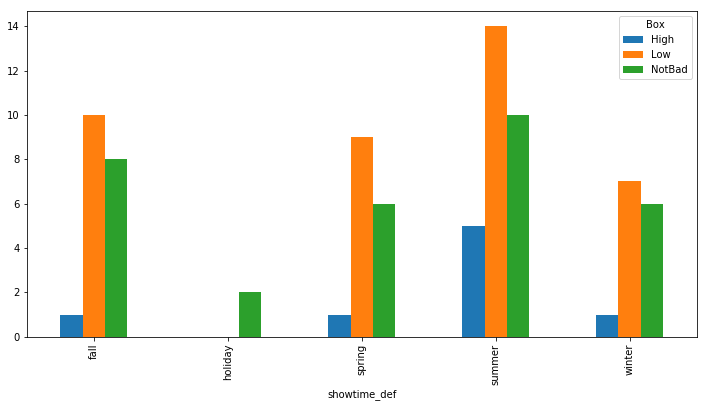

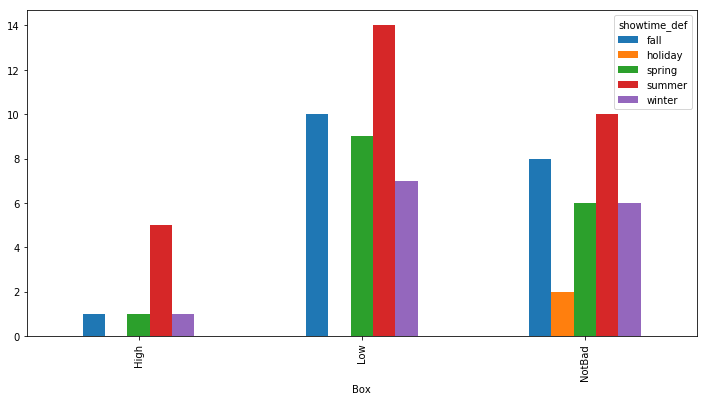

In [60]:
showtimeschart = showtimeschart(2018,2018)
showtimeschart

<h3> 2.5.3 Groupby genre and display the distribution</h3>
<li> Firstly, split genres into every single row.</li>
<li> Secondly, groupby genre </li>
<li> Then, display the distribution. </li>

In [45]:
# We begin to analyze by genre
# split the genres and make it more clear
def genre(begin_year,end_year):
    df = groupbybox(begin_year,end_year)
    data_s = df.drop('Genre', axis=1).join(df['Genre'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre'))
    data_ss = data_s[data_s['Genre'] != '/']
    return data_ss

In [46]:
data_genre = genre(2018,2018)
data_genre

,Name,Runtime,Production Budget,Domestic Gross,Foreign Gross,Worldwide Gross,Release Date,Inrelease Time,Actors,Director,Producer,Distributor,domes_gross,forei_gross,Box,Genre
12 Strong,12 Strong,2 hrs. 9 min.,N/A,"$45,500,164","$21,631,102","$67,131,266","January 19, 2018",70 days / 10 weeks,Chris Hemsworth Michael Shannon Michael Pena,None,None,Warner Bros.,45500164,21631102,Low,War
12 Strong,12 Strong,2 hrs. 9 min.,N/A,"$45,500,164","$21,631,102","$67,131,266","January 19, 2018",70 days / 10 weeks,Chris Hemsworth Michael Shannon Michael Pena,None,None,Warner Bros.,45500164,21631102,Low,Drama
A Quiet Place,A Quiet Place,1 hrs. 35 min.,$17 million,"$188,024,361","$152,652,838","$340,677,199","April 6, 2018",119 days / 17 weeks,Emily Blunt John Krasinski,John Krasinski,None,Paramount,188024361,152652838,NotBad,Horror
A Quiet Place,A Quiet Place,1 hrs. 35 min.,$17 million,"$188,024,361","$152,652,838","$340,677,199","April 6, 2018",119 days / 17 weeks,Emily Blunt John Krasinski,John Krasinski,None,Paramount,188024361,152652838,NotBad,Thriller
A Simple Favor,A Simple Favor,1 hrs. 56 min.,N/A,"$53,548,586","$38,474,986","$92,023,572","September 14, 2018",70 days / 10 weeks,Anna Kendrick Blake Lively Henry Golding,Paul Feig,None,Lionsgate,53548586,38474986,Low,Thriller
A Star is Born (2018),A Star is Born (2018),2 hrs. 16 min.,$36 million,"$193,822,436","$168,600,000","$362,422,436","October 5, 2018",59 days / 8.4 weeks,Lady Gaga Bradley Cooper Sam Elliott Dave C...,Bradley Cooper,None,Warner Bros.,193822436,168600000,NotBad,Music
A Star is Born (2018),A Star is Born (2018),2 hrs. 16 min.,$36 million,"$193,822,436","$168,600,000","$362,422,436","October 5, 2018",59 days / 8.4 weeks,Lady Gaga Bradley Cooper Sam Elliott Dave C...,Bradley Cooper,None,Warner Bros.,193822436,168600000,NotBad,Drama
A Wrinkle in Time,A Wrinkle in Time,1 hrs. 55 min.,N/A,"$100,478,608","$32,197,256","$132,675,864","March 9, 2018",119 days / 17 weeks,Storm Reid Oprah Winfrey Reese Witherspoon ...,Ava DuVernay,None,Buena Vista,100478608,32197256,NotBad,Fantasy
Adrift,Adrift,1 hrs. 36 min.,$35 million,"$31,445,012","$25,600,000","$57,045,012","June 1, 2018",NaN,NaN,NaN,NaN,STX Entertainment,31445012,25600000,Low,Drama
Alpha,Alpha,1 hrs. 36 min.,$51 million,"$35,857,181","$44,541,096","$80,398,277","August 17, 2018",98 days / 14 weeks,Kodi Smit-McPhee Natassia Malthe,Albert Hughes,Andrew Rona,Studio 8,35857181,44541096,Low,Action


In [102]:
# groupby genre analysis
def genretable(begin_year,end_year):
    df = genre(begin_year,end_year)
    import numpy as np
    import pandas as pd
    b = df.groupby(["Box", "Genre"])['domes_gross'].size().reset_index(name='Size')
    b_list = b['Size']/sum(b['Size'])
    b['percentage'] = b_list.apply(lambda x : format(x, '.2%') ) 
    return b

In [103]:
genretable = genretable(2018,2018)
genretable

,Box,Genre,Size,percentage
0,High,Action,7,6.48%
1,High,Adventure,4,3.70%
2,High,Animation,1,0.93%
3,Low,Action,9,8.33%
4,Low,Adventure,3,2.78%
5,Low,Animation,3,2.78%
6,Low,Comedy,11,10.19%
7,Low,Crime,3,2.78%
8,Low,Drama,4,3.70%
9,Low,Family,1,0.93%


In [47]:
# groupby genre analysis: data visualization
def genrechart(begin_year,end_year):
    df = genre(begin_year,end_year)
    import matplotlib.pyplot as plt
    var = df.groupby(['Genre', 'Box']).size()
    var.sort_values(ascending = False).unstack().plot(kind='bar',figsize=(12,6))
    
    var = df.groupby(['Box', 'Genre']).size()
    var.sort_values(ascending = False).unstack().plot(kind='bar',figsize=(12,6))
    b= plt.show()
    return b

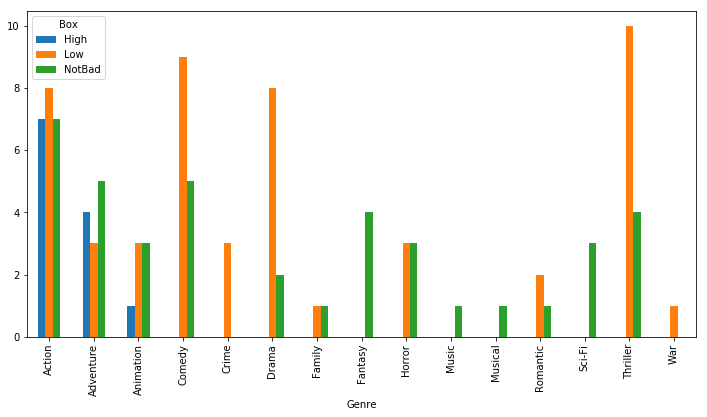

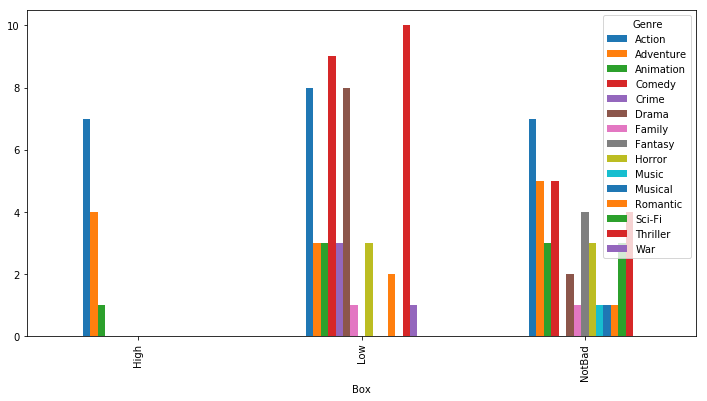

In [48]:
genrechart(2018,2018)

<h2> 2.6 Market concentration trend analysis over a time period</h2>
<li>Are the top movies eating up larger market share or less?</li>

In [16]:
# Market concentration trend analysis: are the top movies eating up larger market share or less?
def yearsum(begin_year,end_year):
    yearsum = []
    top10 = []
    top20 =[]
    top50 = []
    x = []
    
    for year in range(begin_year,end_year+1):
        df = showtimes(year,year)
        x.append(year)
        yearsum.append(sum(df['domes_gross']))
        p10 = df['domes_gross'].iloc[10]
        top10.append(sum(df[df['domes_gross'] > p10]['domes_gross']))
        p20 = df['domes_gross'].iloc[20]
        top20.append(sum(df[df['domes_gross'] > p20]['domes_gross']))
        p50 = df['domes_gross'].iloc[50]
        top50.append(sum(df[df['domes_gross'] > p50]['domes_gross']))
#     return yearsum,top10,top20,top50
    
    CR10a = [a/b for a, b in zip (top10,yearsum)] 
    CR20a = [a/b for a, b in zip (top20,yearsum)]
    CR50a = [a/b for a, b in zip (top50,yearsum)]
    
    CR10 = [format (x,'.2%') for x in CR10a] 
    CR20 = [format (x,'.2%') for x in CR20a] 
    CR50 = [format (x,'.2%') for x in CR50a] 
    
    import numpy as np
    import matplotlib.pyplot as plt
 
    plt.plot(x,CR10)
    plt.plot(x,CR20)
    plt.plot(x,CR50)
    plt.title('Movie Trend')
    picture = plt.show()
    
    return CR10,CR20,CR50,picture

In [19]:
year_sum = yearsum(2013,2018)
year_sum

IndexError: list index out of range

<h2> 2.7 Trend of a specific feature in top 100 movies over a time period.</h2>

In [ ]:
#This function is used to see the trend of a specific feature in top 100 movies from a given year to a given year.
def movie_trend(data,start_year, feature, list_of_feature):
    import numpy as np
    import matplotlib.pyplot as plt
    year_list = list(range(len(data)))
    new_list = [year+start_year for year in year_list]
    for kind in list_of_feature:
        count = []
        for item in data:
            try:
                count.append(item.groupby(feature).size()[kind])
            except:
                count.append(0)
        plt.plot(new_list,count,label=kind)
        plt.title('Movie Trend')
        plt.legend()

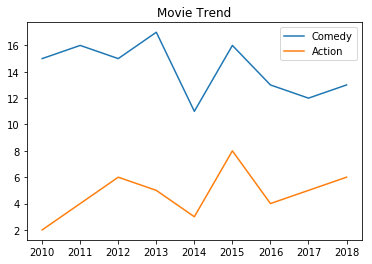

In [68]:
# For example， we can see how the number of comeday movies and action movies change from year 2010 to 2018.
data_total =[]
for i in range(2010,2019):
    data_total.append(movie_data_group(i)) 
movie_genre_trend(data_total,2010,['Comedy','Action'] )

<h2> 2.8 Find the most valuable movie actors over a specific time period.</h2>

In [21]:
# Find the most valuable movie actors over a specific time period
def valuable_actors(year1,year2,top=5):
    import numpy as np
    import pandas as pd
    df = data_movies_format_01(year1,year2)
    df1 = df.drop('Actors', axis=1).join(df['Actors'].str.split('  ', expand=True).stack().reset_index(level=1, drop=True).rename('Actors'))
    df2 = df1.groupby(["Actors"])['domes_gross'].sum().reset_index(name='Contribution')
    df2 = df2[(df2['Actors'] != '(Cameo)') &(df2['Actors'] != '(Voice)')&(df2['Actors'] != ('NaN'))] 
    df2 = df2.sort_values(by = 'Contribution',axis = 0,ascending = False)
    actors = []
    contribution = []
    movie = []
    for i in range(0,top):
        contributer  = df2['Actors'].iloc[i]
        actors.append(contributer)
        contribution.append(df2['Contribution'].iloc[i])
        name = []
        for i in range(0,len(df1['Actors'])):
            if df1['Actors'].iloc[i] == contributer:
                name.append(df1['Name'].iloc[i])
        movie.append(name)
    dict_ = {'Actors':actors,'Total_gross':contribution,'Movie':movie}
    from pandas.core.frame import DataFrame
    table_ = DataFrame(dict_) 
    return table_      

In [23]:
# For example, select actors who contributed top 5 gross in the past 3 years
select_actors = valuable_actors(2016,2018,5)
select_actors 

,Actors,Total_gross,Movie
0,Chadwick Boseman,1786959397,"[Avengers: Infinity War, Black Panther, Captai..."
1,Idris Elba,1603820983,"[Avengers: Infinity War, Molly's Game, Star Tr..."
2,Andy Serkis,1467121110,"[Black Panther, Star Wars: The Last Jedi, War ..."
3,Tom Holland,1421100971,"[Avengers: Infinity War, Captain America: Civi..."
4,"Robert Downey, Jr.",1421100971,"[Avengers: Infinity War, Captain America: Civi..."


<h2> 2.9 Find the most valuable movie directors over a specific time period.</h2>

In [24]:
# Find the most valuable movie directors over a specific time period
def valuable_directors(year1,year2,top=5):
    df = data_movies_format_01(year1,year2)
    df1 = df.drop('Director', axis=1).join(df['Director'].str.split('  ', expand=True).stack().reset_index(level=1, drop=True).rename('Director'))
    df2 = df1.groupby(["Director"])['domes_gross'].sum().reset_index(name='Contribution')
    df2 = df2[(df2['Director'] != '(Cameo)') &(df2['Director'] != '(Voice)')&(df2['Director'] != ('NaN'))] 
    df2 = df2.sort_values(by = 'Contribution',axis = 0,ascending = False)
    director = []
    contribution = []
    movie = []
    for i in range(0,top):
        contributer  = df2['Director'].iloc[i]
        director.append(contributer)
        contribution.append(df2['Contribution'].iloc[i])
        name = []
        for i in range(0,len(df1['Director'])):
            if df1['Director'].iloc[i] == contributer:
                name.append(df1['Name'].iloc[i])
        movie.append(name)
    dict_ = {'Director':director,'Total_gross':contribution,'Movie':movie}
    from pandas.core.frame import DataFrame
    table_ = DataFrame(dict_) 
    return table_     

In [25]:
# For example, select directors who contributed top 5 gross in the past 3 years
select_directors = valuable_directors(2016,2018,5)
select_directors 

,Director,Total_gross,Movie
0,Ryan Coogler,700059566,[Black Panther]
1,Rian Johnson,620181382,[Star Wars: The Last Jedi]
2,Brad Bird,608546638,[Incredibles 2]
3,Zack Snyder,559384489,"[Batman v Superman: Dawn of Justice, Justice L..."
4,Gareth Edwards,532177324,[Rogue One: A Star Wars Story]


 <h2> 2.10 Find the lowest budget/gross ratio movies.</h2>
 <li>It is uesful since a high box office is not a signal for a good movie unless it can spend less and earn more.</li>

In [98]:
#This is a function which helps you to find the lowest budget/gross ratio movies
#It is uesful since a high box office is not a signal for a good movie unless it can spend less and earn more.
def find_hit(year,rank):
    import re
    import pandas as pd
    data = movie_data_group(year)
    list_1 = data['Production Budget'].apply(lambda x: int(re.search(r'[0-9]+',x).group())*1000000 if bool(re.search(r'[0-9]+',x))else 'N/A')
    list_2 = data['Worldwide Gross'].apply(lambda x: int(x[1:].replace(',','')) if x!= 'N/A' else 'N/A')
    list_3 = []
    for i in range(len(list_1)):
        if list_1[i]!= 'N/A' and list_2[i] !='N/A': 
            list_3.append(list_1[i]/list_2[i])
        else:
            list_3.append('N/A')
    data['Ratio'] = ['%.2f%%' % (item * 100) if type(item)!= str else 'N/A' for item in list_3]
    df = pd.DataFrame(data['Ratio'].apply(lambda x: float(x[:-1]) if x!='N/A' else 1000).sort_values(ascending =True)[:rank])
    genre_list = []
    distributor_list = []
    for name in df.index:
        genre_list.append(data.loc[name]['Genre'])
        distributor_list.append(data.loc[name]['Distributor'])
    df['Genre'] = genre_list
    df['Distributor'] = distributor_list
    df['Ratio'] = df['Ratio'].apply(lambda x:str(x)+'%')
    return df

In [99]:
# For example, let's see the top 20 low budget/gross ratio movies,with their genres and distributors
low_bg2010 = find_hit(2010,20)
low_bg2010

,Ratio,Genre,Distributor
Name,,,
The Last Exorcism,1.48%,Horror,Lionsgate
Paranormal Activity 2,1.69%,Horror,Paramount
The King's Speech,3.62%,Historical Drama,Weinstein Company
Black Swan,3.95%,Drama / Thriller,Fox Searchlight
The Twilight Saga:Eclipse,9.74%,Romance,Summit Entertainment
Easy A,10.67%,Romantic Comedy,Sony / Screen Gems
The Karate Kid,11.14%,Action Drama,Sony / Columbia
Jackass 3-D,11.65%,Comedy,Paramount
Despicable Me,12.7%,Animation,Universal


<h1>PART 3: Text mining and analysis</h1>

 <h2> 3.1 Get movie reviews from "https://www.rottentomatoes.com"</h2>

In [36]:
# Select a selected number of reviews based on movies names.
def get_review(name, page_length = 2, num = 20):
    import requests
    from bs4 import BeautifulSoup
    url = 'https://www.rottentomatoes.com/m/'+name+'/reviews/'
    response = requests.get(url)
    results_page = BeautifulSoup(response.content, 'lxml')
    results = results_page.find_all('div', class_ = 'the_review')
    page = 1
    reviews = list()
    next_page_results = list()

    while page < page_length:
        for item in results_page.find_all('a', class_ = 'btn btn-xs btn-primary-rt'):
            if item.find('span', class_ = "glyphicon glyphicon-chevron-right"):
                url = 'https://www.rottentomatoes.com' + item.get('href')
        response = requests.get(url)
        results_page = BeautifulSoup(response.content, 'lxml')
        next_page_results = results_page.find_all('div', class_ = 'the_review')
        results.extend(next_page_results)
        page+=1
    for result in results:
        reviews.append(result.get_text())

    return reviews[:num]

In [37]:
def get_name_review(year, num = 30, page_length = 2, length = 20):
    movies = list(find_from_to(year,year).keys())
    for i in range(len(movies)):
        movies[i] = movies[i].lower().replace(' ', '_').replace(':', '').replace(',', '_').replace('.', '_').replace("'", '').replace('!', '_').replace('?', '').replace('-', '_').replace('(', '').replace(')', '').replace('_a_new_dragon_tattoo_story','').replace('the_equalizer_2','equalizer_2').replace('dr__seuss_the_grinch_2018','the_grinch').replace('disneys_','')
        movies[i] = movies[i].lower().replace('___', '_')
        movies[i] = movies[i].lower().replace('__', '_')
    review_list = list()
    name_list = list(find_from_to(year,year).keys())[:num]
    for movie in movies[:num]:
        review = get_review(movie, page_length, length)
        if not review or len(review)<5:
            try:
                review = get_review(movie+f'_{year}', page_length, length)
            except:
                print('Do not find the movie')
        
        review_list.append(' '.join(review))
    name_review = list(zip(name_list, review_list))
    return name_review

In [38]:
# For example, get rewiews from website of the top 30 movies in 2018.
name_review = get_name_review(2018)
name_review

[('Black Panther',
  " An exciting and refreshing superhero movie that stands out as one of the year's best films.  Black Panther displays all the best elements of the previous Marvel films while also improving upon the formula stylistically and in terms of character strength, particularly the Killmonger, the best villain we've yet seen in this universe.   Black Panther was an entertaining and enlightening film to watch. This film delivers on all levels from the amazing costumes and set pieces all the way down...  Ryan Coogler infused this epic superhero story with a distinctly black identity that is fiercely proud and unafraid to confront the failings of American culture when it comes to the treatment of African-Americans.  Black Panther is a quintessential superhero film, and an above-average one at that, but it isn't a cinematic revelation.  With the prowess and stealth of a jungle cat, BLACK PANTHER pounces into the Marvel canon with exhilarating, action-packed, edge of your seat e

 <h2> 3.2 Do sentiment analysis on movies reviews  and give a recommendation based on their total scores </h2>
 <h3> 3.2.1 Positive or Negative? </h3>

In [39]:
# Get positive and negative word from sentiment analysis lexicon.
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

In [40]:
# Get the proportion of positive and negative words in each review and return them in a table.
def do_pos_neg_sentiment_analysis(reviews):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for review in reviews:
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(review[1]):
            if word in positive_words:
                cpos+=1
            if word in negative_words:
                cneg+=1
        results.append((review[0],cpos/len(word_tokenize(review[1])),cneg/len(word_tokenize(review[1]))))
        
    import pandas as pd    
    df_simple = pd.DataFrame(results, columns = ['name', 'positive', 'negative'])
    df_simple.set_index('name', inplace = True)
    df_simple.sort_values(by = 'positive', ascending = False, inplace = True)
    
    return df_simple

In [41]:
df_simple = do_pos_neg_sentiment_analysis(name_review)
df_simple

,positive,negative
name,,
Black Panther,0.076923,0.014652
Ralph Breaks the Internet,0.073375,0.016771
Ready Player One,0.072089,0.038817
Mission: Impossible - Fallout,0.070652,0.018116
Mamma Mia! Here We Go Again,0.070213,0.023404
Solo: A Star Wars Story,0.069597,0.029304
Crazy Rich Asians,0.069498,0.021236
I Can Only Imagine,0.069098,0.013436
Incredibles 2,0.068519,0.003704


 <h3> 3.2.2  Emotion Analysis</h3>

In [42]:
# Get an emotion dictionary based on NRC data
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as fp:
        lines = list()
        for line in fp:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [43]:
# Return a table of the weight of emotions for each movie.
def comparative_emotion_analyzer(reviews,object_name="name"):
    def emotion_analyzer(review,emotion_dict=emotion_dict):
        emotions = {x for y in emotion_dict.values() for x in y}
        emotion_count = dict()
        for emotion in emotions:
            emotion_count[emotion] = 0

        total_words = len(review.split())
        for word in review.split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(review.split())
        return emotion_count

    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
      
    for review in reviews:
        result = emotion_analyzer(review[1])
        df.loc[review[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
        
    df['All_positive'] = df['Trust'] + df['Positive'] + df['Joy'] + df['Anticipation'] + df['Surprise']
    df['All_negative'] = df['Negative'] +df['Disgust'] +df['Sadness']
    df.sort_values('All_positive', ascending = False, inplace = True)
    
    return df

In [44]:
emotion_dict = get_nrc_data()
df_nrc = comparative_emotion_analyzer(name_review)
df_nrc

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise,All_positive,All_negative
name,,,,,,,,,,,
Mamma Mia! Here We Go Again,0.007500,0.025000,0.020000,0.045000,0.042500,0.002500,0.057500,0.017500,0.017500,0.187500,0.040000
I Can Only Imagine,0.013363,0.037862,0.013363,0.066815,0.033408,0.004454,0.033408,0.022272,0.015590,0.187082,0.040089
Hotel Transylvania 3: Summer Vacation,0.017199,0.024570,0.039312,0.056511,0.039312,0.004914,0.034398,0.007371,0.009828,0.164619,0.051597
Peter Rabbit,0.012712,0.025424,0.016949,0.057203,0.033898,0.006356,0.031780,0.010593,0.012712,0.161017,0.033898
Ocean's 8,0.008351,0.027140,0.020877,0.052192,0.033403,0.002088,0.033403,0.008351,0.012526,0.158664,0.031315
Ralph Breaks the Internet,0.002421,0.026634,0.009685,0.055690,0.031477,0.002421,0.033898,0.000000,0.009685,0.157385,0.012107
Rampage (2018),0.025806,0.027957,0.027957,0.058065,0.027957,0.004301,0.034409,0.006452,0.006452,0.154839,0.038710
Solo: A Star Wars Story,0.014737,0.021053,0.025263,0.054737,0.031579,0.006316,0.035789,0.012632,0.010526,0.153684,0.044211
Incredibles 2,0.008493,0.021231,0.012739,0.059448,0.025478,0.000000,0.031847,0.008493,0.010616,0.148620,0.021231


<h3> 3.2.3 Do vader_comparison </h3>

In [45]:
def vader_comparison(reviews):
    from nltk import sent_tokenize
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import pandas as pd
    headers = ['pos','neg','neu','compound']
    analyzer = SentimentIntensityAnalyzer()
    result = list()
    
    for i in range(len(reviews)):
        name = reviews[i][0]
        sentences = sent_tokenize(reviews[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        result.append([name, pos, neg, neu, compound])
        
    df_v = pd.DataFrame(result, columns = ['name','pos','neg','neu','compound'])
    df_v.set_index('name', inplace = True)
    df_v.sort_values(by = 'compound', ascending = False, inplace = True)
    
    return df_v

In [46]:
df_v = vader_comparison(name_review)
df_v

,pos,neg,neu,compound
name,,,,
A Wrinkle in Time,0.203333,0.000000,0.796667,0.535167
Ralph Breaks the Internet,0.248050,0.022000,0.729950,0.523535
Incredibles 2,0.220727,0.007545,0.771682,0.515673
Crazy Rich Asians,0.309042,0.062083,0.628833,0.510917
Ant-Man and the Wasp,0.244500,0.037167,0.718417,0.489533
Black Panther,0.223300,0.027300,0.749250,0.474010
Peter Rabbit,0.255074,0.039963,0.704963,0.442122
Ready Player One,0.221786,0.046214,0.732036,0.376164
Solo: A Star Wars Story,0.228455,0.086818,0.684591,0.345018


 <h3> 3.2.4 Give a recommendation</h3>

In [52]:
# Assigned scores to movies in each method an dgieve recmmendation based on their total socres.
def get_recommendation(num):
    import pandas as pd
    import numpy as np
    df_v['score1'] = np.arange(30,0,-1)
    df_nrc['score2'] = np.arange(30,0,-1)
    df_simple['score3'] = np.arange(30,0,-1)

    df = pd.merge(pd.DataFrame(df_v['score1']), pd.DataFrame(df_nrc['score2']), left_index=True, right_index=True)
    result = pd.merge(df, pd.DataFrame(df_simple['score3']), left_index=True, right_index=True)
    result['total_score'] = result['score1'] + result['score3'] + result['score3']
    result.sort_values(by='total_score', ascending = False, inplace = True)
    
    return list(result.index)[:num]

In [53]:
recommendation = get_recommendation(5)
recommendation

['Ralph Breaks the Internet',
 'Black Panther',
 'Ready Player One',
 'Crazy Rich Asians',
 'Incredibles 2']

<h2> 3.3 Draw wordclouds</h2>

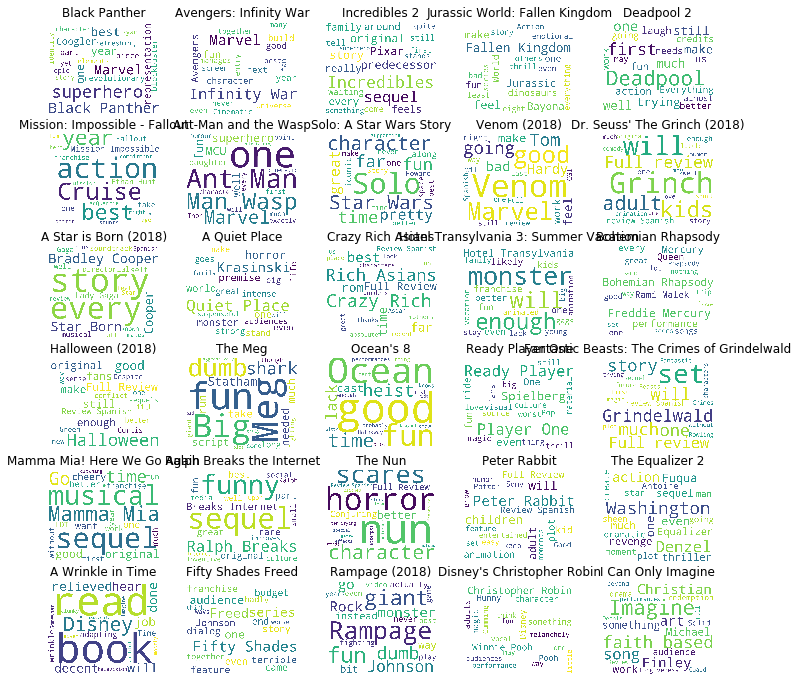

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
DELETE_WORDS = ['movie', 'film']
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up cloud
COL_NUM = 5
ROW_NUM = 6
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(name_review)):
    text_string = remove_words(name_review[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//5, i%5] 
    ax.set_title(name_review[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

 <h2> 3.4 Topic modelling</h2>

In [55]:
# Get topics of all reviews with LDA model and draw by pyLDAvis plot 
def get_topics(num_topics = 5, passes = 10, num_words = 8):
    from nltk import sent_tokenize
    from gensim import corpora
    from gensim.models.ldamodel import LdaModel
    from gensim.parsing.preprocessing import STOPWORDS
    import pprint
    import pyLDAvis.gensim
    review_list = list()
    for review in name_review:
        review_list.append(review[1])
    for i in range(len(review_list)):
        review = review_list[i]
        sents = sent_tokenize(review)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        review_list[i] = ' '.join(sents)
        
    texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word in ['movie','film']]
        for review in review_list]
    
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
    lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
    pp = pprint.PrettyPrinter(indent=4)
    print(pp.pprint(lda.print_topics(num_words)))
    
    return pyLDAvis.display(lda_display)

In [56]:
get_topics()

/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

[   (   0,
        '0.009*"review" + 0.009*"good" + 0.007*"fun" + 0.006*"halloween" + '
        '0.005*"better" + 0.005*"time" + 0.004*"new" + 0.004*"story" + '
        '0.004*"far" + 0.004*"original"'),
    (   1,
        '0.008*"action" + 0.007*"fun" + 0.007*"star" + 0.007*"infinity" + '
        '0.007*"story" + 0.006*"like" + 0.006*"war" + 0.006*"solo" + '
        '0.006*"best" + 0.005*"marvel"'),
    (   2,
        '0.010*"like" + 0.008*"incredibles" + 0.007*"2" + 0.007*"rhapsody" + '
        '0.007*"rampage" + 0.006*"bohemian" + 0.005*"sequel" + 0.005*"time" + '
        '0.005*"freddie" + 0.005*"giant"'),
    (   3,
        '0.009*"superhero" + 0.009*"ready" + 0.008*"best" + 0.008*"marvel" + '
        '0.008*"player" + 0.007*"like" + 0.007*"black" + 0.006*"panther" + '
        '0.006*"venom" + 0.004*"fun"'),
    (   4,
        '0.009*"like" + 0.006*"place" + 0.005*"fun" + 0.005*"great" + '
        '0.005*"quiet" + 0.005*"meg" + 0.004*"review" + 0.004*"best" + '
        '0.004*"goi

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


<h2> 3.5 Decision tree</h2>

In [57]:
# Quantify movies' feature variables and fit them with classification decision tree.
def get_decision_tree_table(year = 2018):
    df1 = movie_data_group(year-2)
    df2 = movie_data_group(year-1)
    df3 = movie_data_group(year)
    import pandas as pd
    import numpy as np
    import re
    movies = pd.concat([df1,df2,df3])[['Distributor', 'Genre', 'MPAA Rating', 'Production Budget','Worldwide Gross']]
    movies.replace('N/A', np.nan, inplace = True)
    movies = movies.dropna()
    movies['Worldwide Gross'] = movies['Worldwide Gross'].map(lambda x: int(x[1:].replace(',','')))
    movies['Production Budget']= movies['Production Budget'].map(lambda x: float(x.replace(' million', '')[1:]))
    movies.loc[movies['MPAA Rating']=='PG','MPAA Rating'] = 1
    movies.loc[movies['MPAA Rating']=='PG-13','MPAA Rating'] = 2
    movies.loc[movies['MPAA Rating']=='R','MPAA Rating'] = 3
    pattern = re.compile(r'^([a-zA-Z-]+)[ /]*\w*$')
    movies['Genre'] = movies['Genre'].map(lambda x: re.findall(pattern, x)[0])
    [movies.loc[movies['Genre']=='Sci-Fi','Genre'], movies.loc[movies['Genre']=='Action','Genre'], movies.loc[movies['Genre']=='Animation','Genre'],
    movies.loc[movies['Genre']=='Adventure','Genre'],movies.loc[movies['Genre']=='Fantasy','Genre'],movies.loc[movies['Genre']=='Drama','Genre'],
    movies.loc[movies['Genre']=='Musical','Genre'],movies.loc[movies['Genre']=='Horror','Genre'],movies.loc[movies['Genre']=='Comedy','Genre'],
    movies.loc[movies['Genre']=='Western','Genre'],movies.loc[movies['Genre']=='Thriller','Genre'],movies.loc[movies['Genre']=='Family','Genre'],
    movies.loc[movies['Genre']=='Crime','Genre'],movies.loc[movies['Genre']=='Romance','Genre'],movies.loc[movies['Genre']=='Romantic','Genre'],
    movies.loc[movies['Genre']=='War','Genre'],movies.loc[movies['Genre']=='Period','Genre'],movies.loc[movies['Genre']=='Music','Genre'],
    movies.loc[movies['Genre']=='Sports','Genre'],movies.loc[movies['Genre']=='Historical','Genre']]= list(range(20))
    [movies.loc[movies['Distributor']=='Buena Vista','Distributor'], movies.loc[movies['Distributor']=='Universal','Distributor'], movies.loc[movies['Distributor']=='Fox','Distributor'],
    movies.loc[(movies['Distributor']=='Warner Bros. (New Line)')|(movies['Distributor']=='Warner Bros.'),'Distributor'],movies.loc[movies['Distributor']=='Paramount','Distributor'],movies.loc[(movies['Distributor']=='Lionsgate/Summit')|(movies['Distributor']=='Lionsgate'),'Distributor'],
    movies.loc[(movies['Distributor']=='Sony / Columbia')|(movies['Distributor']=='Sony / Screen Gems')|(movies['Distributor']=='Sony / AFFIRM Films'),'Distributor'],movies.loc[movies['Distributor']=='STX Entertainment','Distributor'],movies.loc[movies['Distributor']=='Focus Features','Distributor'],
    movies.loc[movies['Distributor']=='TriStar','Distributor'],movies.loc[movies['Distributor']=='Weinstein Company','Distributor'],movies.loc[movies['Distributor']=='Roadside Attractions','Distributor'],
    movies.loc[movies['Distributor']=='Open Road Films','Distributor'],movies.loc[movies['Distributor']=='A24','Distributor'],movies.loc[movies['Distributor']=='Entertainment Studios','Distributor'],
    movies.loc[movies['Distributor']=='Aviron','Distributor'],movies.loc[movies['Distributor']=='Bleecker Street','Distributor'],movies.loc[movies['Distributor']=='Fox Searchlight','Distributor'],
    movies.loc[movies['Distributor']=='MGM','Distributor'],movies.loc[movies['Distributor']=='Studio 8','Distributor']]= list(range(20))
    movies.loc[movies['Worldwide Gross']<=movies['Worldwide Gross'].describe()['75%'],'Worldwide Gross'] = 0
    movies.loc[movies['Worldwide Gross']>movies['Worldwide Gross'].describe()['75%'],'Worldwide Gross'] = 1

    return movies

In [58]:
movies = get_decision_tree_table(year = 2018)
movies

,Distributor,Genre,MPAA Rating,Production Budget,Worldwide Gross
Name,,,,,
Rogue One:A Star Wars Story,0,0,2,200.0,1
Captain America:Civil War,0,1,2,250.0,1
The Secret Life of Pets,1,2,1,75.0,1
The Jungle Book (2016),0,3,1,175.0,1
Deadpool,2,1,3,58.0,1
Batman v Superman:Dawn of Justice,3,1,2,250.0,1
Suicide Squad,3,1,2,175.0,1
Sing,1,2,1,75.0,1
Fantastic Beasts and Where To Find Them,3,4,2,180.0,1


[[107  13]
 [  8  28]]
[[47  8]
 [ 5  7]]


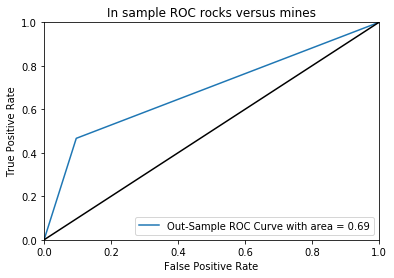

In [62]:
#Get confusion matrix and draw ROC curve
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(movies, test_size = 0.3)
x_train = train.iloc[0:,0:4]
y_train = train[['Worldwide Gross']]
x_test = test.iloc[0:,0:4]
y_test = test[['Worldwide Gross']]

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train)))
print(confusion_matrix(p_test,np.array(y_test)))

from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf()
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()